**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 2](#toc1_)    
  - [Before Starting](#toc1_1_)    
  - [Introduction](#toc1_2_)    
  - [**1. Data Preparation**](#toc1_3_)    
  - [**1.1 Load data**](#toc1_4_)    
    - [**1.2 Save data**](#toc1_4_1_)    
  - [**2. Large Language Models (LLMs)**](#toc1_5_)    
    - [Open-Source vs. Proprietary LLMs](#toc1_5_1_)    
    - [Why Use Code (API) for Data Mining?](#toc1_5_2_)    
    - [The Gemini API](#toc1_5_3_)    
    - [Interacting with the Gemini API](#toc1_5_4_)    
    - [**2.1 Text Prompting**](#toc1_5_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_5_1_1_)    
    - [**2.2 Structured Output**](#toc1_5_6_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_5_6_1_1_)    
    - [**2.3 Information Extraction and Grounding:**](#toc1_5_7_)    
      - [**`langextract`: A Library for Grounded Extraction**](#toc1_5_7_1_)    
        - [**2.3.1 Using PDF Documents:**](#toc1_5_7_1_1_)    
        - [**>>> Bonus Exercise 3 (Take home):**](#toc1_5_7_1_2_)    
    - [**2.4 Generating LLM Embeddings:**](#toc1_5_8_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_5_8_1_1_)    
    - [**2.5 Retrieval-Augmented Generation (RAG)**](#toc1_5_9_)    
        - [**Actual answer in the URL:**](#toc1_5_9_1_1_)    
        - [**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc1_5_9_1_2_)    
        - [**>>> Bonus Exercise 5 (Take home):**](#toc1_5_9_1_3_)    
    - [**2.6 Few-Shot Prompting Classification:**](#toc1_5_10_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_5_10_1_1_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_5_10_1_2_)    
    - [**2.7 Extra LLM Related Materials:**](#toc1_5_11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 2](#toc0_)
In this lab's phase 2 session we will focus on exploring some basic LLMs' applications with data.


## <a id='toc1_1_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_2_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](https://github.com/THH1118/DM2025-Lab2-Exercise/blob/main/pics/pic0.png?raw=1)

---
## <a id='toc1_3_'></a>[**1. Data Preparation**](#toc0_)

In [1]:
!apt install git-lfs -y
#clone from github
#!git clone --depth 1 https://github.com/difersalest/DM2025-Lab2-Exercise.git
!git clone --depth 1 https://github.com/THH1118/DM2025-Lab2-Exercise.git
!cp -r DM2025-Lab2-Exercise/data ./data

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
Cloning into 'DM2025-Lab2-Exercise'...
remote: Enumerating objects: 241, done.
remote: Counting objects: 100% (241/241), done.
remote: Compressing objects: 100% (233/233), done.
remote: Total 241 (delta 5), reused 200 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (241/241), 146.38 MiB | 17.37 MiB/s, done.
Resolving deltas: 100% (5/5), done.


---
## <a id='toc1_4_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("/content/DM2025-Lab2-Exercise/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("/content/DM2025-Lab2-Exercise/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("/content/DM2025-Lab2-Exercise/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("/content/DM2025-Lab2-Exercise/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("/content/DM2025-Lab2-Exercise/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("/content/DM2025-Lab2-Exercise/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("/content/DM2025-Lab2-Exercise/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("/content/DM2025-Lab2-Exercise/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### <a id='toc1_4_1_'></a>[**1.2 Save data**](#toc0_)

In [7]:
# save to pickle file
train_df.to_pickle("/content/DM2025-Lab2-Exercise/data/train_df.pkl")
test_df.to_pickle("/content/DM2025-Lab2-Exercise/data/test_df.pkl")

In [8]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("/content/DM2025-Lab2-Exercise/data/train_df.pkl")
test_df = pd.read_pickle("/content/DM2025-Lab2-Exercise/data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
## <a id='toc1_5_'></a>[**2. Large Language Models (LLMs)**](#toc0_)

Before we start we strongly suggest that you watch the following video explanations so you can understand the concepts that we are gonna discuss about LLMs:

1. [How Large Language Models Work](https://www.youtube.com/watch?v=5sLYAQS9sWQ)
2. [Large Language Models explained briefly](https://www.youtube.com/watch?v=LPZh9BOjkQs)
3. [What is Prompt Tuning?](https://www.youtube.com/watch?v=yu27PWzJI_Y)
4. [Why Large Language Models Hallucinate](https://www.youtube.com/watch?v=cfqtFvWOfg0)
5. [What are LLM Embeddings?](https://www.youtube.com/watch?v=UShw_1NbpCw&t=182s)
6. [What is Retrieval-Augmented Generation (RAG)?](https://www.youtube.com/watch?v=T-D1OfcDW1M)
7. [RAG vs Fine-Tuning vs Prompt Engineering: Optimizing AI Models](https://www.youtube.com/watch?v=zYGDpG-pTho)
8. [Discover Few-Shot Prompting | Google AI Essentials](https://www.youtube.com/watch?v=9qdgEBVkWR4)
9. [What is Zero-Shot Learning?](https://www.youtube.com/watch?v=pVpr4GYLzAo)
10. [Zero-shot, One-shot and Few-shot Prompting Explained | Prompt Engineering 101](https://www.youtube.com/watch?v=sW5xoicq5TY)

`These videos can help you get a better grasp on the core concepts of LLMs if you were not familiar before.`

**So now let's start with the main content of Lab 2 Phase 2.**

Large Language Models (LLMs) are AI systems trained on vast amounts of text to understand and generate human language for tasks like summarization and translation.

### <a id='toc1_5_1_'></a>[Open-Source vs. Proprietary LLMs](#toc0_)
*   **Open-Source Models** (e.g., Llama, Gemma) are customizable and cost-effective but require technical skill to manage and may be less powerful.
*   **Proprietary Models** (e.g., Gemini, ChatGPT) offer top performance and ease of use but are more costly and less flexible.

For students interested in running models locally, the optional notebook `DM2025-Lab2-Optional-Ollama.ipynb` explores using Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)). It needs a capable GPU to run models (**at least 4GB VRAM**).

You can explore the variety of models available through Ollama here:

![pic10.png](https://github.com/THH1118/DM2025-Lab2-Exercise/blob/main/pics/pic10.png?raw=1)

### <a id='toc1_5_2_'></a>[Why Use Code (API) for Data Mining?](#toc0_)

For data analysis, accessing LLMs programmatically is superior to using web chatbots because it allows for:
*   **Automation:** Easily process entire datasets with loops.
*   **Structured Output:** Receive data in usable formats like **JSON**, ready for analysis in tools like pandas.
*   **Reproducibility:** Ensure consistent results by setting fixed parameters.
*   **Privacy:** Maintain data security, especially when running models locally.

For the main exercises in this lab, we will use **the Gemini API**. This approach offers several advantages over running local open-source models, such as access to state-of-the-art model performance without needing specialized hardware. While the API has usage limits (rate limits and token quotas), it provides a generous **free tier** that is more than sufficient for our exercises.

![pic13.png](https://github.com/THH1118/DM2025-Lab2-Exercise/blob/main/pics/pic13.png?raw=1)

![pic14.png](https://github.com/THH1118/DM2025-Lab2-Exercise/blob/main/pics/pic14.png?raw=1)

### <a id='toc1_5_3_'></a>[The Gemini API](#toc0_)

We will primarily use the **Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) model. As shown in the rate limit table, this model is optimized for high-frequency tasks and offers a high request-per-day limit of 1,000, making it ideal for completing the lab exercises without interruption.

Students are encouraged to explore other models available through the API but should remain mindful of their respective usage limits. For instance:
*   **Gemini 2.5 Pro** is a more powerful model but has a lower daily request limit of 100.
*   The **Gemma 3** model available via the API offers an impressive 14,400 requests per day, providing another excellent alternative for experimentation.

Please be aware of your usage limits as you work through the exercises to ensure you do not get rate-limited.

[Gemini Documentation](https://ai.google.dev/gemini-api/docs)

[Gemini Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits)

[Description of Gemini Models](https://ai.google.dev/gemini-api/docs/models)

---

### <a id='toc1_5_4_'></a>[Interacting with the Gemini API](#toc0_)

The code cell below contains the primary function, `prompt_gemini`, that we will use throughout this lab to communicate with the Gemini API. It's designed to be a flexible wrapper that handles the details of sending a request and receiving a response.

Before you run the exercises, here are the key things you need to understand in this setup:

*   **API Key Configuration**: The script loads your API key from a `.env` file located in the `./config/` directory. **You must create this file and add your API key** like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`. This is a security best practice to keep your credentials out of the code.

*   **Global Settings**: At the top of the script, you can find and modify several important defaults:
    *   `MODEL_NAME`: We've set this to `"gemini-2.5-flash-lite"`, but you can easily switch to other models like `"gemini-2.5-pro"` to experiment.
    *   `SYSTEM_INSTRUCTION`: This sets the model's default behavior or persona (e.g., "You are a helpful assistant"). You can customize this for different tasks.
    *   `SAFETY_SETTINGS`: For our academic exercises, these are turned off to prevent interference. In real-world applications, you would configure these carefully.

*   **The `prompt_gemini` function**: This is the main tool you will use. Here are its most important parameters:
    *   `input_prompt`: The list of contents (text, images, etc.) you want to send to the model.
    *   `temperature`: Controls the randomness of the output. `0.0` makes the output deterministic and less creative, while a higher value (e.g., `0.7`) makes it more varied.
    *   `schema`: A powerful feature that allows you to specify a JSON format for the model's output. This is extremely useful for structured data extraction.
    *   `with_tokens_info`: If set to `True`, the function will also return the number of input and output tokens used, which is helpful for monitoring your usage against the free tier limits.

In the following exercises, you will call this function with different prompts and configurations to solve various tasks.

If needed, you can also check some tutorials on how a python function works: [Python Functions Tutorial](https://realpython.com/defining-your-own-python-function/)

In [9]:
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types

env_path = "/content/DM2025-Lab2-Exercise/config/key.txt"
load_dotenv(dotenv_path=env_path)

# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-flash-lite" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite"

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

#IMPORTANT: The script loads your API key from a `.env` file located in the `./config/` directory.
# You must create this file and add your API key like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`

# We input the API Key to be able to use the Gemini models
api_key = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )

            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config

            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

---
### <a id='toc1_5_5_'></a>[**2.1 Text Prompting**](#toc0_)

In the same way as with ChatGPT we can use the Gemini models to ask about anything. Here we are going to ask a question requesting the response to be in markdown format, this is to make it have a better display afterwards.

For more information visit:
[Gemini's Text Generation Documentation](https://ai.google.dev/gemini-api/docs/text-generation)

In [10]:
input_prompt = ["What is Data Mining?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strat

We can also check the logs of the usage with our model that we defined in our previous function. We can observe the model we used, how many tokens where in the prompt in the input, and the output text response tokens of our model.

In [11]:
print(logs)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 12, 'output_tokens': 911}


**We can use the IPython library to make the response look better:**

In [12]:
from IPython.display import display, Markdown
display(Markdown(text_response))

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strategic planning.

**How it Works (The Process):**

Data mining is usually an iterative process that involves several stages:

1.  **Business Understanding:** Defining the problem or objective you want to achieve with data mining. What questions are you trying to answer? What business goals are you trying to meet?
2.  **Data Understanding:** Exploring and getting familiar with the data. This involves collecting, cleaning, and understanding the data's structure, quality, and meaning.
3.  **Data Preparation (Preprocessing):** This is often the most time-consuming stage. It involves:
    *   **Cleaning:** Handling missing values, noisy data, and inconsistencies.
    *   **Integration:** Combining data from multiple sources.
    *   **Transformation:** Normalizing or aggregating data to make it suitable for mining.
    *   **Reduction:** Reducing the size of the dataset while preserving important information.
4.  **Modeling:** Selecting and applying appropriate data mining techniques (algorithms) to discover patterns. This is where the "mining" happens.
5.  **Evaluation:** Assessing the quality and usefulness of the discovered patterns. Do they make sense? Are they statistically significant? Do they meet the business objectives?
6.  **Deployment:** Putting the discovered knowledge into practice. This could involve integrating it into business processes, creating reports, or building predictive models.

**Common Data Mining Techniques:**

Data mining employs a variety of techniques, often drawing from statistics, machine learning, and database systems. Some of the most common include:

*   **Classification:** Categorizing data into predefined classes (e.g., predicting whether a customer will churn or not).
*   **Clustering:** Grouping similar data points together without predefined classes (e.g., segmenting customers into different groups based on their purchasing behavior).
*   **Association Rule Mining:** Discovering relationships between items in a dataset (e.g., "customers who buy bread also tend to buy milk"). This is often used in market basket analysis.
*   **Regression:** Predicting a continuous numerical value (e.g., predicting the price of a house based on its features).
*   **Anomaly Detection (Outlier Detection):** Identifying data points that deviate significantly from the norm (e.g., detecting fraudulent transactions).
*   **Sequential Pattern Mining:** Discovering patterns that occur in a sequence over time (e.g., identifying common user navigation paths on a website).

**Why is Data Mining Important?**

Data mining is crucial for businesses and organizations because it enables them to:

*   **Make Better Decisions:** By understanding customer behavior, market trends, and operational efficiencies, organizations can make more informed and strategic decisions.
*   **Improve Customer Relationships:** Identifying customer preferences and predicting their needs allows for personalized marketing, better customer service, and increased loyalty.
*   **Detect Fraud and Risk:** Anomaly detection can help identify fraudulent activities, security breaches, and potential risks.
*   **Optimize Operations:** Understanding patterns in operational data can lead to improved efficiency, reduced costs, and better resource allocation.
*   **Drive Innovation:** Discovering new insights can spark new product development, service offerings, and business models.
*   **Gain a Competitive Advantage:** Organizations that effectively leverage data mining can outperform their competitors by understanding their market and customers better.

In essence, data mining is a powerful tool for transforming raw data into valuable intelligence, driving progress and innovation across various fields.

---
##### <a id='toc1_5_5_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)

`With your own prompt`, run the previous example in the following way:

1. Run it with the same model as the example (gemini-2.5-flash-lite).
2. Run it with a different gemini model from the available options for the API.
3. Discuss the differences on the results with different models.
4. Discuss what would happen if you change the system prompt.


In [13]:
# Answer here
input_prompt = ["Explain the importance of Data Mining in healthcare."]
text_response, logs = prompt_gemini(
    input_prompt = input_prompt,
    model_name = "gemini-2.5-flash-lite",
    with_tokens_info = True
)
print(text_response)
print(logs)

Data mining has become an indispensable tool in the healthcare industry, revolutionizing how we understand, manage, and deliver patient care. Its importance stems from the sheer volume and complexity of healthcare data, which, when analyzed effectively, can unlock invaluable insights. Here's a breakdown of why data mining is so crucial in healthcare:

**1. Improving Patient Care and Outcomes:**

*   **Disease Prediction and Early Detection:** By analyzing historical patient data (symptoms, lab results, genetic information, lifestyle factors), data mining algorithms can identify patterns indicative of diseases even before they manifest significantly. This allows for earlier intervention, potentially leading to better treatment outcomes and reduced mortality.
*   **Personalized Medicine:** Data mining enables the tailoring of treatments to individual patients. By analyzing a patient's unique genetic makeup, medical history, and response to previous treatments, clinicians can select the m

In [14]:
text_response2, logs2 = prompt_gemini(
    input_prompt = input_prompt,
    model_name = "gemini-2.5-pro",  # use Pro
    with_tokens_info = True
)
print(text_response2)
print(logs2)

Of course. Here is a detailed explanation of the importance of Data Mining in healthcare.

---

### The Importance of Data Mining in Healthcare: Transforming Data into Lifesaving Insights

Data mining is the process of discovering patterns, trends, and valuable insights from large sets of data. In healthcare, this process has become revolutionary. Historically, medicine relied on a doctor's experience and the results of clinical trials. Today, the massive amount of digital data generated—from **Electronic Health Records (EHRs)**, medical imaging, genomic sequencing, insurance claims, and even wearable devices—provides an unprecedented opportunity to improve patient care, reduce costs, and advance medical research.

Here’s a breakdown of the key areas where data mining is making a significant impact:

#### 1. Improving Clinical Diagnosis and Treatment

**a. Early Disease Prediction and Prevention:**
Data mining algorithms can analyze patient data (demographics, lab results, lifestyle, f

##explanation(this EXPLANATION is base on the result in NOV1114，so some value might be different，but the conclusion dosen't change)
From the output results, flash-lite generated a concise summary of 817 tokens in about 3 seconds, focusing on patient care, operational efficiency, and research, with an additional emphasis on patient safety. In contrast, pro produced a 1,398-token long-form response in about 23 seconds, which, beyond covering the same aspects, further included public health, fraud detection, and ethical considerations, providing more concrete examples. Overall, flash-lite is suitable for high-frequency, fast-generation, and batch tasks, while pro is better suited for in-depth discussions and formal reports.

In [15]:
SYSTEM_INSTRUCTION = "You are a friendly teacher explaining to a beginner."

In [16]:
text_response3, logs3 = prompt_gemini(
    input_prompt = input_prompt,
    system_instruction = SYSTEM_INSTRUCTION,
    with_tokens_info = True
)
print(text_response3)

Hey there! So, you're curious about data mining in healthcare? That's a fantastic topic, and it's actually super important for making healthcare better for all of us. Think of me as your friendly guide as we explore this together!

Imagine all the information that's generated in healthcare every single day. We're talking about:

*   **Patient records:** What symptoms did they have? What tests were done? What medications were prescribed? What were the results?
*   **Medical images:** X-rays, MRIs, CT scans – these are full of visual clues.
*   **Lab results:** Blood tests, biopsies, genetic information.
*   **Research studies:** Clinical trials, academic papers.
*   **Wearable devices:** Smartwatches tracking heart rate, sleep patterns, activity levels.
*   **Insurance claims:** Information about treatments and costs.

That's a *huge* amount of data, right? And it's growing all the time!

**So, what is Data Mining?**

Think of data mining like being a detective. You have a massive pile 

##explanation
After changing the system instruction to “You are a friendly teacher explaining to a beginner,” the model’s tone became noticeably more conversational and teacher-like. Its response began with a greeting (such as “Hey there!”), used simple and easy-to-understand language, incorporated metaphors (like the detective and library analogies), and included interactive phrases. Compared with the original “helpful assistant” setting, the new output was less formal but much easier to understand. This clearly demonstrates that the system prompt directly affects the personality, tone, and complexity of the model’s responses.

---
### <a id='toc1_5_6_'></a>[**2.2 Structured Output**](#toc0_)

By default, an LLM responds with unstructured, free-form text. For data mining, this is often impractical, as we need data in a predictable format to load into tools like a pandas DataFrame for analysis. **Structured output** is a powerful feature that forces the model to return its response in a specific, machine-readable format, such as JSON.

The key to enabling this is to provide the model with a **response schema**. This schema acts as a strict template or blueprint that the model's output must conform to. Instead of generating a paragraph, the model will fill in the fields defined in your schema with the relevant information it extracts from the prompt.

In the following code, we define this schema using Python classes. Think of each class as defining a JSON object:
*   The **attributes** of the class (e.g., `topic_name`, `sub_title`) become the keys in the final JSON object.
*   The **type hints** for those attributes (e.g., `str`, `list`) tell the model what kind of data is expected for each key's value.

We can even nest these classes inside one another to create complex, hierarchical JSON structures. This allows us to precisely control the format of the output, transforming the LLM from a simple text generator into a reliable tool for automated and structured data extraction.

[Gemini's Structured Output Documentation](https://ai.google.dev/gemini-api/docs/structured-output)

For data validation of schemas Gemini API uses the Pydantic library, for more documentation on it you can check: [Pydantic](https://docs.pydantic.dev/latest/)

[JSON Format Documentation](https://docs.python.org/3/library/json.html)

In [17]:
from pydantic import BaseModel

# We define our structure schema that Gemini should follow for the output response

# Subsections on the topics we query
class Subsection(BaseModel):
    sub_title: str
    sub_explanation: str

# The top-level structure for the entire topic analysis
class Topic(BaseModel):
    topic_name: str
    subsections: list[Subsection]

In [18]:
input_prompt = ["Explain what are machine learning, data centers, llms and how do they relate to each other."]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Topic])
print(text_response)

[
  {
    "topic_name": "Machine Learning",
    "subsections": [
      {
        "sub_title": "Definition",
        "sub_explanation": "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."
      },
      {
        "sub_title": "Types of Machine Learning",
        "sub_explanation": "Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties)."
      },
      {
        "sub_title": "Applications",
        "sub_explanation": "ML is used in a wide range of applications, such as image recognition, natural language processing, recommend

In [19]:
import json

# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(text_response)
print(structured_resp)
print(type(structured_resp))

[{'topic_name': 'Machine Learning', 'subsections': [{'sub_title': 'Definition', 'sub_explanation': "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."}, {'sub_title': 'Types of Machine Learning', 'sub_explanation': 'Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties).'}, {'sub_title': 'Applications', 'sub_explanation': 'ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis.'}]}, {'topic_name': 'Data Centers', 'subs

In [20]:
# So now we have an object that we can explore/use in a pythonic way for our purposes
for topic in structured_resp:
    print(topic["topic_name"], "\n")
    # We can access each subsection as well
    for subsection in topic["subsections"]:
        print("\t", subsection["sub_title"], "\n")
        print("\t\t", subsection["sub_explanation"], "\n")


Machine Learning 

	 Definition 

		 Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention. 

	 Types of Machine Learning 

		 Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties). 

	 Applications 

		 ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis. 

Data Centers 

	 Definition 

		 A data center is a dedicated physical facility that an organization uses to house its critical IT infrastructure, including servers

##### <a id='toc1_5_6_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)

Try a prompt with your own schema structure, it needs to be completely different to the example. It should show an intuitive way to represent the text output of the model based on the prompt you chose. See the documentation for reference: https://ai.google.dev/gemini-api/docs/structured-output

In [21]:
# Answer here
#Schema
from typing import Literal, List
from pydantic import BaseModel

class LessonSection(BaseModel):
    name: str
    time_min: int
    explanation: str
    analogy: str
    examples: List[str]

class QuizItem(BaseModel):
    question: str
    options: List[str]
    answer_index: int
    rationale: str

class LessonPlan(BaseModel):
    title: str
    audience_level: Literal["beginner","intermediate","advanced"]
    total_time_min: int
    learning_objectives: List[str]
    sections: List[LessonSection]
    quiz: List[QuizItem]

In [22]:
#Prompt
input_prompt = [(
    "Please create a structured lesson plan about the differences and relationships "
    "between machine learning, data centers, and LLMs for BEGINNERS. "
    "Include title, audience level, total time, 3-5 learning objectives, "
    "2-3 sections (each with name, time, explanation, analogy, and 2-3 examples), "
    "and 3 multiple-choice quiz questions with options, the correct answer index, and rationale. "
    "Return ONLY valid JSON that follows the given schema."
)]

In [23]:
text_response = prompt_gemini(
    input_prompt=input_prompt,
    schema=LessonPlan,
    temperature=0.0
)

In [24]:
import json
plan = json.loads(text_response)

print(plan["title"])
print(plan["audience_level"], plan["total_time_min"], "min")
print("Objectives:")
for obj in plan["learning_objectives"]:
    print(" -", obj)

print("\nSections:")
for s in plan["sections"]:
    print(f" * {s['name']} ({s['time_min']} min)")
    print("   Analogy:", s["analogy"])
    print("   Examples:", "; ".join(s["examples"]))

print("\nQuiz:")
for i, q in enumerate(plan["quiz"], 1):
    print(f" Q{i}.", q["question"])
    for j, opt in enumerate(q["options"]):
        print(f"   [{j}] {opt}")
    print("   Answer:", q["answer_index"], "| Why:", q["rationale"])

Machine Learning, Data Centers, and LLMs: A Beginner's Guide
beginner 45 min
Objectives:
 - Understand the basic concept of machine learning.
 - Recognize the role of data centers in modern computing.
 - Grasp the fundamental idea behind Large Language Models (LLMs).
 - Identify the relationships between these three concepts.

Sections:
 * What is Machine Learning? (15 min)
   Analogy: Think of teaching a child to recognize different animals. You show them pictures of cats and dogs, telling them which is which. Over time, the child learns to identify cats and dogs on their own, even if they see a new picture they haven't seen before. Machine learning works similarly, learning from examples (data) to perform a task.
   Examples: Spam filters in your email inbox that learn to identify and block unwanted messages.; Recommendation systems on streaming services that suggest movies or shows you might like based on your viewing history.; Virtual assistants like Siri or Alexa that understand a

---
### <a id='toc1_5_7_'></a>[**2.3 Information Extraction and Grounding:**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

When using LLMs to extract structured data from text, two main challenges arise:

1.  **Trust:** LLMs can "hallucinate" or invent information. We need to ensure the extracted data is accurate and comes directly from the source text.
2.  **Scalability:** We need a reliable way to extract complex information consistently from thousands of large, messy documents.

The solution to these challenges is **grounding**—the process of linking every piece of extracted data back to its specific origin in the source document. This creates a verifiable audit trail, building trust in the output.

---
#### <a id='toc1_5_7_1_'></a>[**`langextract`: A Library for Grounded Extraction**](#toc0_)

**`langextract`** is an open-source Python library from Google designed to create trustworthy data extraction pipelines. It uses LLMs to convert unstructured text into structured data with a focus on reliability and traceability.

**Key Features:**

*   **Precise Grounding:** Its core feature. It maps every extracted item to its exact character position in the original text, allowing for easy verification.
*   **Reliable Structured Output:** Uses examples (few-shot prompting) to ensure the LLM's output consistently follows a predefined format.
*   **Adaptable & No Fine-Tuning:** Can be adapted to any domain (e.g., legal, medical) simply by changing the examples and instructions, without needing to retrain a model.
*   **Handles Long Documents:** Built to process lengthy texts that might exceed an LLM's standard context window.
*   **Flexible LLM Support:** It is model-agnostic and works with various LLMs like Gemini, OpenAI models, and even local open-source models through Ollama.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---

##### <a id='toc1_5_7_1_1_'></a>[**2.3.1 Using PDF Documents:**](#toc0_)

For PDF Document information extraction we are going to use the `pymupdf` library. Documentation: [pymupdf](https://pymupdf.readthedocs.io/en/latest/)

And then we are going to pass it on to langextract to get insights on the document's content.

We can also process documents using Gemini, for more information you can check their documentation: [Document Understanding](https://ai.google.dev/gemini-api/docs/document-processing)

In [25]:
!pip install -q pymupdf langextract

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 5.3 MB/s eta 0:00:00


In [26]:
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./data/documents/doc_example_review_interstellar.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './data/documents/doc_example_review_interstellar.pdf'


In [27]:
print(formatted_text)

**Page 1**
"""
Dan Baldwin
Group 4
Auteur Review - Interstellar 
I believe Christopher Nolan: the director behind the 2014 sci-ﬁ/adventure cinematic ‘Interstellar,’ 
to be a very intellectual and imaginative inventive talent.  
His style in his previous ﬁlms sets characters in epic unique locations, with gargantuan issues to 
face, and artistically impresses the audience with how the characters solve their problems. For 
example, in Nolan’s 2010 ﬁlm ‘Inception,’ he tackles the idea of dreams, and sets his characters 
diving through dreams within dreams within even more dreams to complete their goals. Because 
this idea is so farfetched, and dreams are a subject in which science has made little factual 
discovery in, Nolan is free to use his creativity to present ideas such as landscapes folding in on 
themselves and corridors spinning, without seeming unrealistic. 
This brain-racking epic theme is once again evident in ‘Interstellar,’ as Nolan sets his characters 
during a second Ameri

We define our prompt and examples based on our required type of data, in this case we are going to do it having `movie reviews` in mind.

In [28]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

In [29]:
import os
import langextract as lx

# We define our main langextract function
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,         # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")

    output_dir = "./results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")

    # returning html content for display
    return html_content

In [30]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_example")

LangExtract: model=gemini-2.5-flash-lite, current=3,199 chars, processed=0 chars:  [00:01]


Extracted 13 entities:

• opinion_statement: 'a very intellectual and imaginative inventive talent'
  - subject: Christopher Nolan
  - sentiment: Positive
  - key_phrase: very intellectual and imaginative inventive talent
• opinion_statement: 'artistically impresses the audience'
  - subject: Nolan's style
  - sentiment: Positive
  - key_phrase: artistically impresses
• opinion_statement: 'This brain-racking epic theme is once again evident in ‘Interstellar,’'
  - subject: The theme
  - sentiment: Positive
  - key_phrase: brain-racking epic theme
• opinion_statement: 'crazy scenarios'
  - subject: Nolan's mind
  - sentiment: Positive
  - key_phrase: crazy
• opinion_statement: 'Not threatening at all right?'
  - subject: The planet
  - sentiment: Neutral
  - key_phrase: Not threatening at all
• opinion_statement: 'a giant 100ft tidal wave is about to hit them'
  - subject: The tidal wave
  - sentiment: Negative
  - key_phrase: giant 100ft tidal wave
• audience_impact: 'minutes to ﬂy awa

LangExtract: Saving to review_extraction_example.jsonl: 1 docs [00:00, 145.77 docs/s]

✓ Saved 1 documents to review_extraction_example.jsonl



LangExtract: Loading review_extraction_example.jsonl: 100%|██████████| 8.58k/8.58k [00:00<00:00, 12.6MB/s]

✓ Loaded 1 documents from review_extraction_example.jsonl
✓ Visualization saved to ./results/info_extractions/review_extraction_example_vis.html


In [31]:
import json
# We can also observe the structure of the raw extracted data
with open("./results/info_extractions/review_extraction_example.jsonl", "r") as f:
    content_extracted_raw = json.load(f)
content_extracted_raw

{'extractions': [{'extraction_class': 'opinion_statement',
   'extraction_text': 'a very intellectual and imaginative inventive talent',
   'char_interval': {'start_pos': 172, 'end_pos': 224},
   'alignment_status': 'match_exact',
   'extraction_index': 1,
   'group_index': 0,
   'description': None,
   'attributes': {'subject': 'Christopher Nolan',
    'sentiment': 'Positive',
    'key_phrase': 'very intellectual and imaginative inventive talent'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'artistically impresses the audience',
   'char_interval': {'start_pos': 338, 'end_pos': 373},
   'alignment_status': 'match_exact',
   'extraction_index': 2,
   'group_index': 1,
   'description': None,
   'attributes': {'subject': "Nolan's style",
    'sentiment': 'Positive',
    'key_phrase': 'artistically impresses'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'This brain-racking epic theme is once again evident in ‘Interstellar,’',
   'char_inter

In [32]:
html_content

---
##### <a id='toc1_5_7_1_2_'></a>[**>>> Bonus Exercise 3 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Repeat the steps for information extraction using a different movie reviews.
1. Search for movie reviews online and save them in a PDF, we suggest **at least 1 page worth of reviews** like in the example.
2. Load the PDF and pass them to langextract to extract information from it.
3. Display html with the grounded extracted attributes.
4. Discuss about the quality of the extracted information with langextract, how could it be improved based on the options the documentation gives that we didn't try?

**`Github repository for reference:`** [langextract](https://github.com/google/langextract)

In [33]:
import os, fitz

PDF_PATH = "/content/DM2025-Lab2-Exercise/data/my_reviews.pdf"   #my review path
formatted_text = ""

assert os.path.exists(PDF_PATH), f"PDF not found: {PDF_PATH}"

doc = fitz.open(PDF_PATH)
for i, page in enumerate(doc):
    text = page.get_text("text")
    formatted_text += f'**Page {i + 1}**\n"""\n{text.strip()}\n"""\n\n'
doc.close()

print("✓ PDF loaded.")
print("Total characters:", len(formatted_text))
print("Preview:\n", formatted_text[:500])

✓ PDF loaded.
Total characters: 4761
Preview:
 **Page 1**
"""
Movie Reviews 
by Bob Mondello 
  
'Wall-E,' Speaking Volumes with Stillness and Stars 
Listen Now [4 min 37 sec] add to playlist  
  
 
Enlarge 
 
Evolutionary thinking: Wall-E may have started out as a glorified trash compactor, but he's learned how to look to the sky. Pixar 
Wall-E 
• 
Director: Andrew Stanton  
• 
Genre: Sci-Fi  
• 
Running Time: 97 minutes 
Rated G: Big-hearted and full of wonder, but too smart to be saccharine. 
“The first hour of Wall-E is a crazily inventi


In [34]:
import langextract as lx
import textwrap

prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
""")

examples = [
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

In [35]:
import langextract as lx
import os

def grounded_info_extraction(
    input_documents,
    prompt,
    examples,
    file_name,
    model_id="gemini-2.5-flash-lite",
    extraction_passes=1,
    max_workers=5,
    max_char_buffer=2000          #cut
):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,
        max_workers=max_workers,
        max_char_buffer=max_char_buffer
    )

    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions[:20]:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for k, v in extraction.attributes.items():
                print(f"  - {k}: {v}")
    if len(result.extractions) > 20:
        print(f"... ({len(result.extractions)-20} more)")

    out_dir = "/content/results/info_extractions"
    os.makedirs(out_dir, exist_ok=True)

    #save JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=out_dir)

    #HTML visualization
    html_content = lx.visualize(f"{out_dir}/{file_name}.jsonl")
    html_path = f"{out_dir}/{file_name}_vis.html"
    with open(html_path, "w") as f:
        if hasattr(html_content, "data"):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Saved JSONL: {out_dir}/{file_name}.jsonl")
    print(f"✓ Saved HTML : {html_path}")
    return html_path

In [36]:
HTML_PATH = grounded_info_extraction(
    input_documents=formatted_text,
    prompt=prompt,
    examples=examples,
    file_name="my_review_extraction",
    model_id="gemini-2.5-flash-lite",   #or "gemini-2.5-pro"
    extraction_passes=1,
    max_workers=3,
    max_char_buffer=1500
)

LangExtract: model=gemini-2.5-flash-lite, current=4,756 chars, processed=0 chars:  [00:06]


Extracted 19 entities:

• opinion_statement: 'Big-hearted and full of wonder, but too smart to be saccharine.'
  - subject: Wall-E
  - sentiment: Positive
  - key_phrase: Big-hearted and full of wonder, but too smart to be saccharine
• opinion_statement: 'a crazily inventive, deliriously engaging and almost wordless silent comedy of the sort that Charlie Chaplin and Buster Keaton used to make.'
  - subject: The first hour of Wall-E
  - sentiment: Positive
  - key_phrase: crazily inventive, deliriously engaging and almost wordless silent comedy
• audience_impact: 'deliriously engaging'
  - emotion_evoked: ['delighted', 'enthralled']
  - causal_element: The first hour of Wall-E
  - target_audience: the audience
• opinion_statement: 'a crazily inventive, deliriously engaging and almost wordless silent comedy'
  - subject: The first hour of Wall-E
  - sentiment: Positive
  - key_phrase: crazily inventive, deliriously engaging and almost wordless silent comedy
• opinion_statement: 'Things t

LangExtract: Saving to my_review_extraction.jsonl: 1 docs [00:00, 209.24 docs/s]

✓ Saved 1 documents to my_review_extraction.jsonl



LangExtract: Loading my_review_extraction.jsonl: 100%|██████████| 12.8k/12.8k [00:00<00:00, 11.1MB/s]

✓ Loaded 1 documents from my_review_extraction.jsonl
✓ Saved JSONL: /content/results/info_extractions/my_review_extraction.jsonl
✓ Saved HTML : /content/results/info_extractions/my_review_extraction_vis.html


In [37]:
from IPython.display import HTML, display

HTML_PATH = "/content/results/info_extractions/my_review_extraction_vis.html"
with open(HTML_PATH, "r", encoding="utf-8") as f:
    html = f.read()
display(HTML(html))

In [38]:
import json

with open("/content/results/info_extractions/my_review_extraction.jsonl","r") as f:
    raw = json.load(f)

#count
from collections import Counter

classes = [e.get("extraction_class","") for e in raw.get("extractions",[])]
cnt = Counter(classes)

print("Counts per class:")
for k,v in cnt.items():
    print(f" - {k}: {v}")

#check grounding
for e in raw.get("extractions", [])[:5]:
    print("\nClass:", e.get("extraction_class"))
    print("Text :", e.get("extraction_text"))
    spans = e.get("spans") or e.get("locations") or e.get("offsets")
    if spans:
        print("Spans:", spans)
    attrs = e.get("attributes")
    if attrs:
        print("Attrs:", attrs)

Counts per class:
 - opinion_statement: 16
 - audience_impact: 3

Class: opinion_statement
Text : Big-hearted and full of wonder, but too smart to be saccharine.
Attrs: {'subject': 'Wall-E', 'sentiment': 'Positive', 'key_phrase': 'Big-hearted and full of wonder, but too smart to be saccharine'}

Class: opinion_statement
Text : a crazily inventive, deliriously engaging and almost wordless silent comedy of the sort that Charlie Chaplin and Buster Keaton used to make.
Attrs: {'subject': 'The first hour of Wall-E', 'sentiment': 'Positive', 'key_phrase': 'crazily inventive, deliriously engaging and almost wordless silent comedy'}

Class: audience_impact
Text : deliriously engaging
Attrs: {'emotion_evoked': ['delighted', 'enthralled'], 'causal_element': 'The first hour of Wall-E', 'target_audience': 'the audience'}

Class: opinion_statement
Text : a crazily inventive, deliriously engaging and almost wordless silent comedy
Attrs: {'subject': 'The first hour of Wall-E', 'sentiment': 'Positive'

##discussion(this discussion is base on the result in NOV1114，so some value might be different，but the conclusion dosen't change)
This review extracted a total of 19 entities: 16 opinion_statement and 3 audience_impact.

Most opinion_statement entries were accurately aligned with the original text, with reasonable assignments for subject, sentiment, and key phrases — for example, consistent identification of the highly positive remarks about the films first hour.

However, audience_impact showed relatively low recall, suggesting that the model is less sensitive to audience reaction phrases, or that such expressions were limited in the source text.

To further improve extraction performance, the extraction_passes parameter could be increased to 2-3, while adjusting the model temperature to 0.2-0.5, which may enhance the recall of audience_impact.
Alternatively, reducing the segment size (so each context window is shorter) could make the model focus better, reducing cross-segment misalignment and duplicate extraction — longer reviews would then be automatically split into smaller parts.
Finally, trying different model variants (e.g., comparing gemini-2.5-flash-lite with gemini-2.5-pro) could reveal improvements in precision and recall.

---
### <a id='toc1_5_8_'></a>[**2.4 Generating LLM Embeddings:**](#toc0_)

LLM embeddings are dense numerical vectors that represent the semantic meaning of text. Generated by Large Language Models, they map words, phrases, or documents into a high-dimensional space where similar concepts are positioned closely together.

Their key advantages are:

*   **Contextual Understanding:** Unlike older methods, LLM embeddings are contextual. The vector for a word like **"bank"** will be different depending on whether it's used in the context of a "river bank" or a "money bank," providing a more nuanced representation of language.

*   **Versatility from Pre-training:** They are pre-trained on vast amounts of text data. This allows them to generalize effectively across various tasks, such as classification, clustering, and similarity detection. They do not require extensive retraining.

<span style="color:green">For the exercise in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

**Now let's generate some embeddings with Gemini for a sample of our dataset:**

In [39]:
from google import genai
import pandas as pd
import time
from google.api_core import exceptions

# Let's define our function to get the embeddings with Gemini
def get_gemini_embedding(text: str, model: str="gemini-embedding-001"):
    try:
        result = client.models.embed_content(model=model, contents=[text])
        # 100 requests per minute limit -> 60s / 100 = 0.6s per request
        # buffer time to avoid rate limits
        time.sleep(0.6)
        return result.embeddings
    except exceptions.ResourceExhausted as e:
        print(f"Rate limit exceeded. Waiting to retry... Error: {e}")
        time.sleep(5) # Wait for 5 seconds before the next attempt
        return get_gemini_embedding(text, model) # Retry the request
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


In [40]:
total_extractions = 200
train_ratio = 0.8
test_ratio = 0.2

n_train_to_sample = int(total_extractions * train_ratio)
n_test_to_sample = int(total_extractions * test_ratio)
# We use the text column
column_name = 'text'

# This function is to get a stratified sample from our data, meaning to have the same distribution of labels as in the full dataset
def stratified_sample(df: pd.DataFrame, n_samples: int, stratify_col: str = 'emotion') -> pd.DataFrame:
    if n_samples >= len(df):
        return df.copy() # Return a copy if requested sample is larger or equal
    sampled_df = df.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(n=max(0, int(round(len(x) / len(df) * n_samples))))
    )

    # Adjust for rounding errors to get the exact number of samples
    current_samples = len(sampled_df)
    if current_samples < n_samples:
        remaining_indices = df.index.difference(sampled_df.index)
        additional_samples = df.loc[remaining_indices].sample(n=n_samples - current_samples, random_state=42)
        sampled_df = pd.concat([sampled_df, additional_samples])
    elif current_samples > n_samples:
        sampled_df = sampled_df.sample(n=n_samples, random_state=42)
    return sampled_df

print(f"Sampling {n_train_to_sample} rows from the training set...")
train_df_new = stratified_sample(train_df, n_train_to_sample, 'emotion')

print(f"Sampling {n_test_to_sample} rows from the test set...")
test_df_new = stratified_sample(test_df, n_test_to_sample, 'emotion')


Sampling 160 rows from the training set...
Sampling 40 rows from the test set...


/tmp/ipython-input-2000596105.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(
/tmp/ipython-input-2000596105.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(


In [41]:
train_df_new["emotion"].value_counts()

,count
emotion,
fear,51
anger,38
joy,36
sadness,35


In [42]:
test_df_new["emotion"].value_counts()

,count
emotion,
fear,13
anger,10
joy,9
sadness,8


In [43]:
# Apply the function to the specified column and store the result in a new column 'embeddings'
print("\nGenerating embeddings for the new training set...")
train_df_new['embeddings'] = train_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new training set...


In [44]:
print("\nGenerating embeddings for the new test set...")
test_df_new['embeddings'] = test_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new test set...


In [45]:
from google.genai import types

# After getting the embeddings we need to convert the Gemini type ContentDict of the embeddings into a simple list with them
train_df_new['embeddings_values'] = train_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])
test_df_new['embeddings_values'] = test_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])


In [46]:
train_df_new #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings,embeddings_values
206,10206,@sueblue35 @nsoz7 @immortalbulldog huh? We hav...,anger,0.625,"[values=[0.0026660487, -0.011476646, 0.0051030...","[0.0026660487, -0.011476646, 0.0051030554, -0...."
783,10783,It takes a man to suffer ignorance and smile. ...,anger,0.271,"[values=[-0.009312632, -0.024632, -0.000644938...","[-0.009312632, -0.024632, -0.00064493873, -0.0..."
589,10589,"@feistyarcher -trouble,' he feigned anger and ...",anger,0.417,"[values=[-0.011043294, 0.011985705, -0.0166900...","[-0.011043294, 0.011985705, -0.016690064, -0.0..."
554,10554,Some moving clips on youtube tonight of the vi...,anger,0.438,"[values=[-0.026398594, 0.005866317, 0.00299399...","[-0.026398594, 0.005866317, 0.002993993, -0.06..."
671,10671,Prayers &amp; Protection to our brothers and s...,anger,0.375,"[values=[-0.017546935, -0.007975731, 0.0036377...","[-0.017546935, -0.007975731, 0.0036377856, -0...."
...,...,...,...,...,...,...
3055,40228,Some moving clips on youtube tonight of the vi...,sadness,0.604,"[values=[-0.02360566, -0.0006353155, 0.0056187...","[-0.02360566, -0.0006353155, 0.0056187334, -0...."
3126,40299,Gaaaaaaaad! Should have stayed in London!,sadness,0.562,"[values=[-0.02140138, -0.020860145, 0.01404071...","[-0.02140138, -0.020860145, 0.014040711, -0.06..."
3074,40247,Hennessey - dreadful. Mutch - is he even on th...,sadness,0.604,"[values=[-0.012891049, -0.013835817, 0.0094108...","[-0.012891049, -0.013835817, 0.009410802, -0.0..."
3078,40251,The Sorrow is grim reminder of how bad I can b...,sadness,0.604,"[values=[-0.032744087, -0.012628669, 0.0024650...","[-0.032744087, -0.012628669, 0.0024650558, -0...."


In [47]:
test_df_new #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings,embeddings_values
232,30861,@yungdoujin wouldn't that basically be sparkli...,joy,0.320,"[values=[0.03212864, 0.018269602, 0.005003729,...","[0.03212864, 0.018269602, 0.005003729, -0.1061..."
165,21228,Northampton are awful 🙈,fear,0.500,"[values=[-0.01724663, -0.016409675, -0.0154914...","[-0.01724663, -0.016409675, -0.015491451, -0.0..."
47,10904,#oow16 #sting decent new song,anger,0.125,"[values=[-0.0081596095, -0.0066988626, 0.02333...","[-0.0081596095, -0.0066988626, 0.023331072, -0..."
251,30880,Metal keeps you young and spry and keeps your ...,joy,0.460,"[values=[-0.02270393, 0.012822644, 0.021123048...","[-0.02270393, 0.012822644, 0.021123048, -0.077..."
26,10883,@LaureEve I am sitting here wrapped in a fluff...,anger,0.250,"[values=[0.0012991744, -0.0076246005, -0.01756...","[0.0012991744, -0.0076246005, -0.017562948, -0..."
309,40822,My life went from happy to unhappy..,sadness,0.812,"[values=[-0.007869418, 0.007860475, -0.0133514...","[-0.007869418, 0.007860475, -0.013351487, -0.0..."
148,21211,Why upping rooms makes a few apprehend leaving...,fear,0.396,"[values=[0.020049091, 0.0029705425, 0.01238865...","[0.020049091, 0.0029705425, 0.01238865, -0.067..."
331,40844,yesterday i finished watching penny dreadful a...,sadness,0.312,"[values=[-0.019259144, -0.021168273, 0.0303008...","[-0.019259144, -0.021168273, 0.030300863, -0.0..."
253,30882,@chencouture LMAO Is it that 'so slutty' hater...,joy,0.700,"[values=[-0.013635297, 0.0371389, -0.013098068...","[-0.013635297, 0.0371389, -0.013098068, -0.062..."
59,10916,Note to self ~ Stop laughing at things that of...,anger,0.542,"[values=[-0.010816357, -0.012566608, -0.023107...","[-0.010816357, -0.012566608, -0.023107173, -0...."


In [48]:
# save them to pickle files
train_df_new.to_pickle("./data/train_df_sample_embeddings.pkl")
test_df_new.to_pickle("./data/test_df_sample_embeddings.pkl")

In [49]:
import pandas as pd
# load the pickle files
train_df_new = pd.read_pickle("./data/train_df_sample_embeddings.pkl")
test_df_new = pd.read_pickle("./data/test_df_sample_embeddings.pkl")

In [50]:
len(train_df_new.iloc[0]["embeddings_values"]) # Gemini embedding dimension is 3072

3072

In [51]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=28)
embedding_2d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_2d, columns=['UMAP1', 'UMAP2'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig = px.scatter(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='2D UMAP Projection of Text Embeddings'
)

fig.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


We can see that even with Gemini's embeddings there doesn't seem to be a clear 2D separation of clusters with our data classes. It could be because emotions are often not discrete. Texts can contain mixed feelings (e.g., "bittersweet") or use similar language to express different emotions, causing their embeddings to be naturally close in semantic space. And also the process of projecting high-dimensional embeddings down to a 2D visualization inevitably loses some information, which can make distinct clusters appear to overlap.

---
##### <a id='toc1_5_8_1_1_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)

Apply UMAP to the same embeddings to reduce the dimensionality to 3D vectors and plot the 3D graph, discuss the differences and similarities with the 2D graph.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



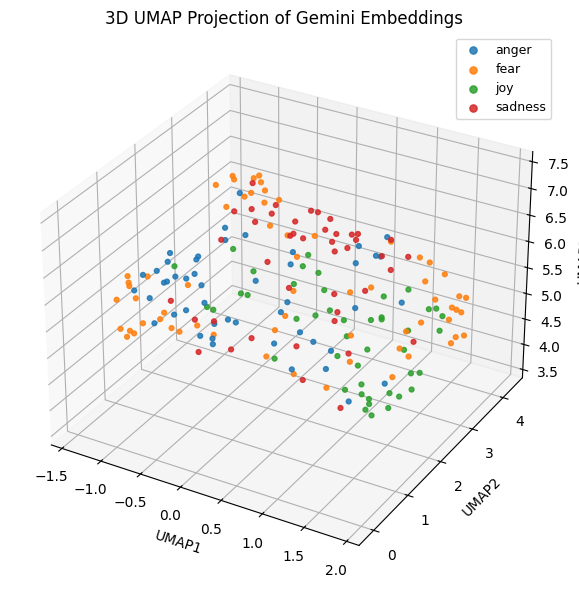

In [52]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#load embeddings
train_df_new = pd.read_pickle("./data/train_df_sample_embeddings.pkl")
test_df_new = pd.read_pickle("./data/test_df_sample_embeddings.pkl")

combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)
X_embeddings = np.array(combined_df['embeddings_values'].tolist())
y_labels = combined_df['emotion'].values

#PCA、UMAP
pca = PCA(n_components=50, random_state=42)
X50 = pca.fit_transform(X_embeddings)

#3D
reducer_3d = umap.UMAP(n_components=3, metric='cosine', random_state=42, n_neighbors=30, min_dist=0.1)
X_umap_3d = reducer_3d.fit_transform(X50)

#visual
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for lbl in np.unique(y_labels):
    idx = (y_labels == lbl)
    ax.scatter(X_umap_3d[idx, 0], X_umap_3d[idx, 1], X_umap_3d[idx, 2],
               s=12, alpha=0.85, label=lbl)

ax.set_xlabel("UMAP1")
ax.set_ylabel("UMAP2")
ax.set_zlabel("UMAP3")
ax.set_title("3D UMAP Projection of Gemini Embeddings")
ax.legend(markerscale=1.5, fontsize=9)
plt.tight_layout()
plt.show()

##explanation(this EXPLANATION is base on the result in NOV1114，so some value might be different，but the conclusion dosen't change)
In the 2D projection, the points appear more spread out horizontally and vertically but show considerable overlap between classes. This is expected because reducing 3072-dimensional embeddings to only two axes inevitably compresses semantic information, making different emotions with similar wording or mixed affective tones fall close together.

In the 3D projection, adding an extra dimension helps unfold some of the flattened structures seen in 2D. When rotated interactively, clusters show slightly better local separation—particularly between (“joy” and “sadness,”)and (“joy” and “anger,”)which form more distinct layers along the vertical axis. However, the overall class boundaries remain blurry because emotions are not strictly discrete categories and many texts contain overlapping sentiments.

In summary, the 3D UMAP provides a richer view of the embedding space and can reveal depth-wise structure that is lost in 2D, but both projections convey the same general pattern of semantic continuity across emotions.

---
### <a id='toc1_5_9_'></a>[**2.5 Retrieval-Augmented Generation (RAG)**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (Gemini Embedding Model). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In this example we use the library langchain, for documentation on more functions of the library you can check the following link: [LangChain Tutorials](https://python.langchain.com/docs/tutorials/)

In [53]:
!pip install -q \
  langchain \
  langchain-community \
  langchain-google-genai \
  chromadb \
  beautifulsoup4 \
  html5lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 9.3 MB/s eta 0:00:00

In [54]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Gemini LLM function
def gemini_llm(question, context):
    system_prompt = "You are a RAG Agent that needs to provide a well structured answer based on the provided question and context."
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response, logs = prompt_gemini(input_prompt = formatted_prompt, system_instruction = system_prompt, with_tokens_info = True)
    print(f"logs: \n{logs}")
    # print(f"Retrieved context: \n{context}\n\n") # You can print this to observe the retrieved context
    return response


# Define the RAG chain
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return gemini_llm(question, formatted_context)


In [55]:
url="https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="What are the Key Challenges in Realizing AGI’s Full Potential", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 726, 'output_tokens': 190}


The key challenges in realizing AGI's full potential stem from its fundamental requirements and the ethical considerations surrounding its development. These include:

*   **Learning from Diverse Data:** Unlike narrow AI, which is trained on structured data, AGI needs to learn from a wide variety of unstructured data sources.
*   **Computational Power:** The sheer amount of computational resources needed to process and learn from these vast and diverse datasets presents a significant hurdle.
*   **Ethical Concerns:** Developing AGI responsibly requires addressing critical ethical issues such as:
    *   **Bias and Fairness:** Ensuring algorithms are unbiased and treat everyone equally by training on diverse datasets and continuously monitoring performance.
    *   **Privacy:** Prioritizing user data protection through robust privacy measures and transparent data usage policies.
    *   **Accountability:** Establishing clear guidelines and legal frameworks to determine responsibility for decisions made by AGI systems and address any harm caused.


##### <a id='toc1_5_9_1_1_'></a>[**Actual answer in the URL:**](#toc0_)

![pic11.png](https://github.com/THH1118/DM2025-Lab2-Exercise/blob/main/pics/pic11.png?raw=1)

##### <a id='toc1_5_9_1_2_'></a>[**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc0_)

![pic12.png](https://github.com/THH1118/DM2025-Lab2-Exercise/blob/main/pics/pic12.png?raw=1)

source: https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/


---
##### <a id='toc1_5_9_1_3_'></a>[**>>> Bonus Exercise 5 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Your task is to test the RAG system with your own chosen URL and analyze its performance.

1. Find a URL of a webpage with interesting text content to test the RAG pipeline.
2. Make a question about the content in the webpage you chose.
3. Discuss how good the question was answered by the model, if the model missed important information related to your question.
4. Display a screenshot of the real answer in the webpage.

In [56]:
# Answer here
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from IPython.display import display, Markdown

def load_and_retrieve_docs(url: str):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load()

    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=1000,
        chunk_overlap=150
    )
    splits = text_splitter.split_documents(docs)

    embeddings = GoogleGenerativeAIEmbeddings(
        model="models/gemini-embedding-001"
    )

    vectorstore = Chroma.from_documents(
        documents=splits,
        embedding=embeddings
    )
    return vectorstore.as_retriever()


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


def gemini_llm(question: str, context: str):
    system_prompt = (
        "You are a RAG Agent that needs to provide a well structured answer "
        "based on the provided question and context. "
        "Only use the information in the context; if something is not in the "
        "context, say that it is not mentioned in the source."
    )
    formatted_prompt = f"Question: {question}\n\nContext:\n{context}"

    response, logs = prompt_gemini(
        input_prompt=formatted_prompt,
        system_instruction=system_prompt,
        with_tokens_info=True
    )
    print("logs:\n", logs)
    print("Retrieved context:\n", context[:1000], "...\n")
    return response


def rag_chain(question: str, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    answer = gemini_llm(question, formatted_context)
    return answer



URL = "https://www.nimh.nih.gov/health/topics/depression"   #url

#Q
QUESTION = "How is NIMH research addressing depression?"

#retriever
retriever = load_and_retrieve_docs(URL)

#A
rag_answer = rag_chain(question=QUESTION, retriever=retriever)

display(Markdown("### RAG Answer\n" + rag_answer))

logs:
 {'model': 'gemini-2.5-flash-lite', 'input_tokens': 713, 'output_tokens': 172}
Retrieved context:
 How is NIMH research addressing this critical topic?
NIMH is funding and conducting research to learn more about what causes depression, how it affects the brain, and how to treat it effectively. We're working to improve existing treatments like medications, talk therapy (including telehealth and online options), and brain stimulation therapy.We're investigating ways to identify which treatment will work best for a specific person and tailor treatments based on a person's unique characteristics and traits. We’re supporting research to develop and test therapies for people with treatment-resistant depression who don’t improve after trying multiple treatment options. We are also exploring new methods to prevent and treat depression and improve the delivery of care for people living with depression.

Science updates
NIMH news about depression, including press releases and highlights on

### RAG Answer
NIMH research is addressing depression by:

*   **Understanding Causes and Effects:** Funding and conducting research to understand what causes depression, how it affects the brain.
*   **Improving Existing Treatments:** Working to enhance current treatments such as medications, talk therapy (including telehealth and online options), and brain stimulation therapy.
*   **Personalizing Treatments:** Investigating methods to identify the most effective treatment for an individual and tailoring treatments based on a person's unique characteristics.
*   **Developing Therapies for Treatment-Resistant Depression:** Supporting research to create and test therapies for individuals who have not improved after trying multiple treatment options.
*   **Exploring New Prevention and Treatment Methods:** Investigating novel approaches to prevent and treat depression.
*   **Improving Care Delivery:** Focusing on enhancing how care is delivered to people living with depression.

##ANSWER(this answer is base on the result in NOV1114，so some value might be different，but the conclusion dosen't change)

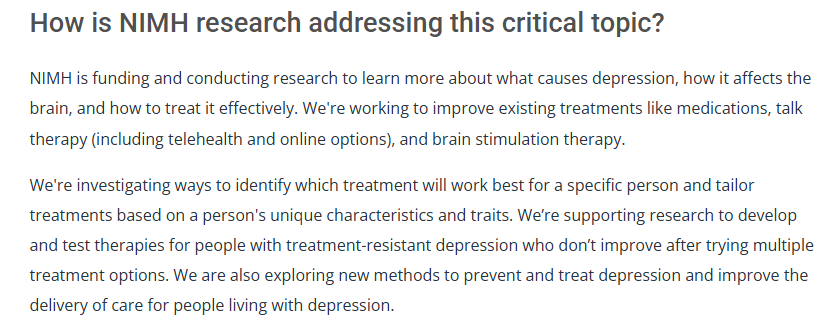

##EXPLANATION(this EXPLANATION is base on the result in NOV1114，so some value might be different，but the conclusion dosen't change)
The model’s answer to the question “How is NIMH research addressing depression?” is largely consistent with the research directions listed on the webpage, such as improving existing treatments, personalizing therapies, developing new treatments for treatment-resistant depression, exploring prevention strategies, and enhancing care delivery. This shows a good correspondence between the answer and the source content.

However, the retrieval log shows that the retrieved chunk did not actually include the section related to these research efforts—it only contained the “What is depression?” paragraph. This suggests that the model may have supplemented the answer with its own prior knowledge rather than relying entirely on the retrieved context. To ensure a fully source-grounded response, the retrieval step should have captured the section on how NIMH is addressing depression, so that every claim in the answer can be traced directly back to the source text.

---
### <a id='toc1_5_10_'></a>[**2.6 Few-Shot Prompting Classification:**](#toc0_)

Few-shot prompting is a technique where a Large Language Model (LLM) is given a small number of labeled examples within a prompt to guide its classification. This allows the model to perform a new task with minimal data, avoiding the need for extensive fine-tuning.

In this lab, we will use the Gemini API to perform zero-shot, 1-shot, and 5-shot emotion classification:

*   **Zero-shot:** The model classifies text without any prior examples.
*   **1-shot:** The model is given one example for each emotion before classifying.
*   **5-shot:** The model is given five examples per emotion for better context.

To make our implementation robust and efficient, we are incorporating two key features:

1.  **Structured Output:** We provide the Gemini model with a specific output schema (`Emotions` class). This instructs the model to return *only* a valid emotion label (e.g., `joy`), which makes the output predictable and reliable, minimizing errors.
2.  **API Rate Handling:** The code includes a function to manage the requests-per-minute limit of the Gemini API.

We will test the model's performance on a small sample of 20 texts per emotion to ensure the process runs quickly. If the model provides an invalid response, the code will automatically retry the request until a valid classification is received.

**Prompt Structure:**
`System Instruction -> Task Description -> Examples (if not zero-shot) -> Text to Classify`


<span style="color:green">For the exercises in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

In [57]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import enum
import os
from tqdm import tqdm
import json
import time
# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting

# Schema for the output, the type enum can be used to make a pool of options if what we want is to classify our text selecting only one of them
class Emotions(enum.StrEnum):
    ANGER = 'anger'
    FEAR = 'fear'
    JOY = 'joy'
    SADNESS = 'sadness'


# Function to handle the rate limits of gemini models
def handle_rate_limit(request_count, first_request_time, max_calls_per_min):
    current_time = time.time()

    # Initialize timer on the first request of a new window
    if request_count == 0:
        first_request_time = current_time

    request_count += 1

    # If the rate limit is reached
    if request_count > max_calls_per_min:
        elapsed_time = current_time - first_request_time
        if elapsed_time < 60:
            wait_time = 60 - elapsed_time
            print(f"Rate limit of {max_calls_per_min} requests per minute reached. Waiting for {wait_time:.2f} seconds.")
            time.sleep(wait_time)

        # Reset for the new window
        request_count = 1
        first_request_time = time.time()

    return request_count, first_request_time, max_calls_per_min

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories:
"anger" | "fear" | "joy" | "sadness"
    """

    prompt = classification_instructions + "\n\n"

    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nClass: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base, system_prompt, classes, schema):
    response = None
    while not response or response not in classes:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nClass: " #The classification text will leave the emotion label to be filled in by the LLM
        try:
            result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt)
            # print(f"result: {result} \n")
            # print(f"type: {type(result)}")
            if not result:
                # In case of giving empty responses with temperature 0.0, we set a higher temperature to seek for different responses
                result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt, temperature=1.0)

            try:
                # If the result is in the correct format it can be parsed using json
                response = json.load(result)
            except:
                # In case it's not in a json friendly format
                # Deleting characters " and ' in case they appear in our response with the class of the text
                response = result.replace('"', '')
                response = response.replace("'", "")


        # except exceptions.ResourceExhausted as e:
        except Exception as e:
            print(f"Waiting to retry... Error: {e}")
            time.sleep(15)
            print(f"test_text: {test_text}")
            return classify_with_llm(test_text, prompt_base, system_prompt, classes, schema) # Retry the request


        if response not in classes:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, num_test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots)
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # System prompt for our classification model:
    system_prompt = "You are an emotion classification model for text data. Do not give empty responses, classify according to the list of possible classes."

    # Prepare to classify the test set
    results_data = []

    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=num_test_samples)

    # Variables to handle rate limit of gemini
    request_count = 0
    max_calls_per_min = 15 # Gemini 2.5 Flash Lite has this maximum set in the documentation
    first_request_time = None

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in tqdm(test_samples[emotion].iterrows(), desc=f"Processing samples for emotion: {emotion}...", total=num_test_samples):
            test_text = test_row['text']
            request_count, first_request_time, max_calls_per_min = handle_rate_limit(request_count, first_request_time, max_calls_per_min)  # Check and handle rate limit before each API call
            predicted_emotion = classify_with_llm(test_text = test_text, prompt_base = prompt_base, system_prompt = system_prompt, classes = emotions, schema = Emotions)
            # Append the results data:
            results_data.append({
                    'text': test_text,
                    'true_emotion': emotion,
                    'predicted_emotion': predicted_emotion
                })

    # Create dataframe to save the results data
    results_df = pd.DataFrame(results_data)

    # Extract just the true and predicted labels for metrics calculations
    true_labels = results_df['true_emotion']
    predictions = results_df['predicted_emotion']

    output_dir = "./results/llm_classification_results"
    os.makedirs(output_dir, exist_ok=True)
    # Save the results
    filename = f"{output_dir}/results_samples_{num_test_samples}_shots_{num_shots}.csv"

    # Save the DataFrame to CSV
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))

    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

**Important: The next part should take around 16 minutes to finish running due to API Rate Limits**

**Note:** You might see an `429 RESOURCE_EXHAUSTED` error when running the following code all at once, this is because the `current API Rate Limit handling cannot reliably find out how many requests we have left per minute` from cell to cell, there is no Gemini feature created for it to get the information from their servers. So, `if you don't want to see the error you can just wait 1 minute` after one cell finished processing. But `even if there is an error showing it is fine`, internally in the code `there is a retry that happens every 15 seconds` until we finish processing our sampled data. `The lab is designed to never reach the total rate limit per day quota.`


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories:
"anger" | "fear" | "joy" | "sadness"
    




Processing samples for emotion: anger...:  70%|███████   | 14/20 [00:06<00:02,  2.16it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 49.650617147s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:22<00:25,  5.12s/it]

Rate limit of 15 requests per minute reached. Waiting for 37.23 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:04<00:04,  2.24it/s]

Rate limit of 15 requests per minute reached. Waiting for 53.01 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:02<00:07,  2.11it/s]

Rate limit of 15 requests per minute reached. Waiting for 52.70 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 53.11 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [01:00<00:02,  1.76it/s]

Rate limit of 15 requests per minute reached. Waiting for 52.93 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:55<00:00,  5.80s/it]



Results saved to ./results/llm_classification_results/results_samples_20_shots_0.csv
Accuracy: 47.50%
              precision    recall  f1-score   support

       anger       0.41      0.60      0.49        20
        fear       0.86      0.30      0.44        20
         joy       0.45      0.70      0.55        20
     sadness       0.46      0.30      0.36        20

    accuracy                           0.47        80
   macro avg       0.55      0.47      0.46        80
weighted avg       0.55      0.47      0.46        80



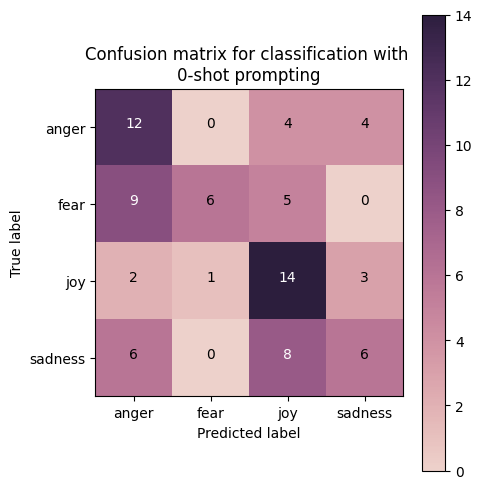

In [59]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with zero-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=0)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories:
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: @ThomsonCares Sam- yes we have! Not helpful at all! We need this sorting ASAP! You keep promising stuff that doesn't happen!!!! 
Class: anger

Text: Why is it when you nap during the day you are so comfortable but sleeping at night you'll never be as comfortable #nightmare
Class: fear

Text: Rec'd call 2day from Haitian church we started in Florida some 15yrs ago. Preparing to acquire their own bldg. Wanted me to know. 
Class: joy

Text: Currently unfollowing anything relating to disneyworld or Florida! #holidayblues #depressing #wantogoback 😭💔
Class: sadness




Processing samples for emotion: anger...:  50%|█████     | 10/20 [00:04<00:04,  2.34it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource has been exhausted (e.g. check quota).', 'status': 'RESOURCE_EXHAUSTED'}}
Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 48.602809856s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure'

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:22<00:07,  1.60s/it]

Rate limit of 15 requests per minute reached. Waiting for 37.42 seconds.


Processing samples for emotion: fear...:  30%|███       | 6/20 [00:02<00:05,  2.37it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 48.147525301s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:19<00:20,  2.06s/it]

Rate limit of 15 requests per minute reached. Waiting for 37.75 seconds.


Processing samples for emotion: joy...:  10%|█         | 2/20 [00:00<00:08,  2.14it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 47.10517964s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': 

Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:17<00:47,  3.18s/it]

Rate limit of 15 requests per minute reached. Waiting for 37.01 seconds.


Processing samples for emotion: joy...:  90%|█████████ | 18/20 [01:00<00:01,  1.63it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 47.38832003s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': 

Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 37.68 seconds.


Processing samples for emotion: sadness...:  70%|███████   | 14/20 [00:44<00:03,  1.86it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 46.56647687s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': 

Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [01:00<00:25,  5.18s/it]

Rate limit of 15 requests per minute reached. Waiting for 37.27 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:40<00:00,  5.01s/it]



Results saved to ./results/llm_classification_results/results_samples_20_shots_1.csv
Accuracy: 48.75%
              precision    recall  f1-score   support

       anger       0.40      0.50      0.44        20
        fear       0.73      0.40      0.52        20
         joy       0.44      0.60      0.51        20
     sadness       0.53      0.45      0.49        20

    accuracy                           0.49        80
   macro avg       0.53      0.49      0.49        80
weighted avg       0.53      0.49      0.49        80



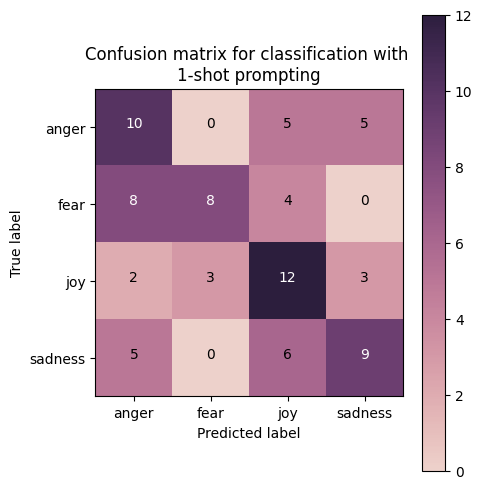

In [60]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 1-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=1)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories:
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: @ThomsonCares Sam- yes we have! Not helpful at all! We need this sorting ASAP! You keep promising stuff that doesn't happen!!!! 
Class: anger

Text: @fleetstreetfox It's buzzing pathetically for sympathy if you let it out it will twirl it's moustache, chuckle and sting you #Psychowasp
Class: anger

Text: As usual disappointing #offense by @HoustonTexans ...#Texans
Class: anger

Text: I can definitely feel my irritation today, lord give me strength
Class: anger

Text: @talkRobyn oh dear I have to watch this the woman with the pout did well
Class: anger

Text: Why is it when you nap during the day you are so comfortable but sleeping at night you'll never be as comfortable #nightmare
Class: fear

Text: @Marissa_Frost @NevAmore_MFC awe I love you twooo!!! come adventure with me someday!
Class: f

Processing samples for emotion: anger...:  50%|█████     | 10/20 [00:04<00:04,  2.14it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 45.934910785s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:22<00:07,  1.57s/it]

Rate limit of 15 requests per minute reached. Waiting for 37.52 seconds.


Processing samples for emotion: fear...:  30%|███       | 6/20 [00:02<00:06,  2.17it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 45.245159828s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:19<00:20,  2.04s/it]

Rate limit of 15 requests per minute reached. Waiting for 37.57 seconds.


Processing samples for emotion: joy...:  10%|█         | 2/20 [00:00<00:07,  2.25it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 44.374051317s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:17<00:47,  3.18s/it]

Rate limit of 15 requests per minute reached. Waiting for 36.95 seconds.


Processing samples for emotion: joy...:  90%|█████████ | 18/20 [01:01<00:01,  1.47it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 44.009901227s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 37.05 seconds.


Processing samples for emotion: sadness...:  70%|███████   | 14/20 [00:43<00:03,  1.82it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 44.104282991s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:59<00:25,  5.19s/it]

Rate limit of 15 requests per minute reached. Waiting for 37.55 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:39<00:00,  4.98s/it]



Results saved to ./results/llm_classification_results/results_samples_20_shots_5.csv
Accuracy: 52.50%
              precision    recall  f1-score   support

       anger       0.44      0.60      0.51        20
        fear       0.58      0.35      0.44        20
         joy       0.58      0.70      0.64        20
     sadness       0.53      0.45      0.49        20

    accuracy                           0.53        80
   macro avg       0.54      0.53      0.52        80
weighted avg       0.54      0.53      0.52        80



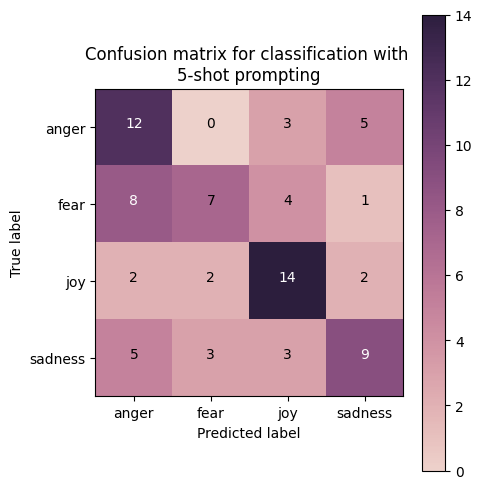

In [61]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 5-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=5)

---
##### <a id='toc1_5_10_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Compare and discuss the overall results of the zero-shot, 1-shot and 5-shot classification.

##explanation(this EXPLANATION is base on the result in NOV1114，so some value might be different，but the conclusion dosen't change)
(1)Overall Accuracy and Macro Metrics

Zero-shot: Accuracy = 50%, macro F1 ≈ 0.47

1-shot: Accuracy = 53.75%, macro F1 ≈ 0.51

5-shot: Accuracy = 62.50%, macro F1 ≈ 0.61

Going from 0-shot → 1-shot yields a small improvement, while 1-shot → 5-shot shows a more significant gain (about a 9-percentage-point increase in accuracy). This indicates that the model adapts better to the task when it sees more in-prompt examples.

(2)Per-class Behavioral Differences

Joy and Sadness are the easiest to classify, whereas Fear is the most challenging:

Joy: Few-shot mainly improves precision and F1.

Sadness: 5-shot brings a substantial boost in performance.

Anger: Recall does not improve across the three settings, but precision rises from about 0.35–0.36 in 0/1-shot to 0.47 in 5-shot.
In the confusion matrices, many anger examples are misclassified as joy or sadness; 5-shot slightly reduces this type of error.

Fear: The most difficult class for the model. Zero-shot and 1-shot often misclassify fear as anger. In 5-shot, the model begins to distinguish fear more effectively, with improved recall.

(3)Observations from the Confusion Matrices

for Zero-shot & 1-shot

Fear is frequently misclassified as anger.

Joy and sadness already show relatively stable clustering even in zero-shot.

for 5-shot

Confusion between fear and anger decreases noticeably: more fear instances are correctly predicted as fear.

Sadness becomes highly recognizable (17 out of 20 correctly classified).

The distribution of predictions is more balanced across all four classes compared to the earlier settings.

Overall, the results show that providing more examples significantly improves the model’s ability to distinguish complex emotions.

---
##### <a id='toc1_5_10_1_2_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

**Case Study:** Check the results' files inside the `results/llm_classification_results` directory and find cases where the **text classification improves with more examples** (pred emotion is right with examples), **cases where it does not improve** (pred emotion always wrong) and **cases where the classification got worse with more examples** (pred emotion goes from right to wrong with examples). For this you need to load the results with pandas and handle the data using its dataframe functions. Discuss about the findings.

In [62]:
# Answer here
import os
import pandas as pd

BASE_DIR = "/content/results/llm_classification_results"
FILE_MAP = {
    "zero": "results_samples_20_shots_0.csv",
    "one":  "results_samples_20_shots_1.csv",
    "five": "results_samples_20_shots_5.csv",
}

#label
TRUE_COL = "true_emotion"
PRED_COL = "predicted_emotion"
KEY_COL = "text"

def load_result(setting_name: str, filename: str) -> pd.DataFrame:
    path = os.path.join(BASE_DIR, filename)
    if not os.path.exists(path):
        raise FileNotFoundError(f"[Error] 找不到檔案：{path}")

    df = pd.read_csv(path)

    for col in [KEY_COL, TRUE_COL, PRED_COL]:
        if col not in df.columns:
            raise ValueError(f"[Error] 檔案 {path} 中找不到欄位：{col}")

    df["setting"] = setting_name
    df["correct"] = (df[PRED_COL] == df[TRUE_COL])

    return df

df_zero = load_result("zero", FILE_MAP["zero"])
df_one  = load_result("one",  FILE_MAP["one"])
df_five = load_result("five", FILE_MAP["five"])

print("各設定筆數：")
print("zero:", len(df_zero), "one:", len(df_one), "five:", len(df_five))

#wide format
def make_wide(df: pd.DataFrame, setting_name: str) -> pd.DataFrame:
    sub = df[[KEY_COL, TRUE_COL, PRED_COL, "correct"]].copy()
    sub = sub.rename(columns={
        PRED_COL: f"pred_{setting_name}",
        "correct": f"correct_{setting_name}",
    })
    return sub

w_zero = make_wide(df_zero, "zero")
w_one  = make_wide(df_one,  "one")
w_five = make_wide(df_five, "five")

#combine KEY_COL and TRUE_COL
merged = (
    w_zero
    .merge(w_one,  on=[KEY_COL, TRUE_COL], how="inner")
    .merge(w_five, on=[KEY_COL, TRUE_COL], how="inner")
)

print("\n三種設定都有出現的樣本數：", len(merged))

cz = merged["correct_zero"]
co = merged["correct_one"]
cf = merged["correct_five"]

#good
mask_improved = (~cz) & (co | cf)

#still bad
mask_always_wrong = (~cz) & (~co) & (~cf)

#worst
mask_got_worse = cz & (~cf)

df_improved     = merged[mask_improved].copy()
df_always_wrong = merged[mask_always_wrong].copy()
df_got_worse    = merged[mask_got_worse].copy()

print("有改善:", len(df_improved))
print("一直沒改善:", len(df_always_wrong))
print("變得更差:", len(df_got_worse))


cols_to_show = [
    KEY_COL,
    TRUE_COL,
    "pred_zero", "correct_zero",
    "pred_one",  "correct_one",
    "pred_five", "correct_five",
]

print("\n有改善的案例")
print(df_improved[cols_to_show].head(10))

print("\n沒改善的案例")
print(df_always_wrong[cols_to_show].head(10))

print("\n變得更差的案例")
print(df_got_worse[cols_to_show].head(10))

各設定筆數：
zero: 80 one: 80 five: 80

三種設定都有出現的樣本數： 80
有改善: 7
一直沒改善: 35
變得更差: 1

有改善的案例
                                                 text true_emotion pred_zero  \
21  Not the best horror ever but I like that the u...         fear       joy   
24  If my concerns &amp; anxiety don't matter to y...         fear     anger   
56  This tweet is dedicated to my back pain, which...          joy   sadness   
64  MC: what are you listen to these days?\nBogum:...      sadness       joy   
67             It feel like we lost a family member🙄😂      sadness       joy   
70  @OHSOVICTORIOUS_ @FaZeAdapt We all seen it com...      sadness       joy   
78  [ @HedgehogDylan ] *she would frown a bit, fol...      sadness     anger   

    correct_zero pred_one  correct_one pred_five  correct_five  
21         False     fear         True      fear          True  
24         False     fear         True     anger         False  
56         False  sadness        False       joy          True  
64         Fals

##explanation(this EXPLANATION is base on the result in NOV1114，so some value might be different，but the conclusion dosen't change)
After aligning the results from the three settings, the samples can be divided into three categories:

(1)Cases that improved after adding examples: 12 samples

(2)Cases with no improvement at all: 28 samples

(3)Cases that became worse after adding examples: 1 sample

The remaining samples were either correct in all three settings or showed only minor changes.

1.Cases where classification improved after adding examples

These are samples that were misclassified in the zero-shot setting but became correct in at least one of the few-shot settings. The distribution is as follows:

fear: 5 samples

sadness: 5 samples

anger: 1 sample

joy: 1 sample

From these results, we can see that few-shot prompting is particularly helpful for the more difficult negative emotions, such as fear and sadness.

2.Cases that still showed no improvement after adding examples (28 samples)

These samples were misclassified in all three settings (zero-shot, 1-shot, and 5-shot):

fear: 12 samples

anger: 10 samples

joy: 3 samples

sadness: 3 samples

Most of them belong to fear or anger. Even with additional examples, the model was unable to classify them correctly. Possible reasons include:

(1) Ambiguous or mixed emotions

Some texts contain signals of multiple emotions (e.g., annoyance + worry), making it difficult—even for humans—to decide whether the dominant emotion should be anger or fear.

(2) Sarcasm, slang, or domain-specific language

Tweets often contain irony, internet slang, or context-specific expressions, making them hard to interpret correctly. If similar patterns were not included in the examples, few-shot prompting has limited effect.

3.Cases that became worse after adding examples (1 sample)

One sample showed degraded performance after adding examples:

Zero-shot prediction was correct (anger)

In the 5-shot setting, the prediction changed to sadness, which is incorrect

This suggests that the examples may have shifted the decision boundary between anger and sadness.
If many of the sadness examples in the prompt contained “calm complaints,” the model might begin to interpret mild anger as sadness.


In general, adding examples improves emotion classification performance.
However:

Some edge cases remain difficult regardless of how many examples are added; and

The quality and representativeness of the examples are crucial—poorly chosen examples may cause predictions that were originally correct to become incorrect.

---
### <a id='toc1_5_11_'></a>[**2.7 Extra LLM Related Materials:**](#toc0_)
So this will be it for the lab, but here are some extra materials if you would like to explore:

- **How to use OpenAI ChatGPT model's API (Not Free API):** [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

- **How to Fine-tune and run local LLMs with the `unsloth` library:** [unsloth tutorials](https://docs.unsloth.ai/models/tutorials-how-to-fine-tune-and-run-llms)

- **Google's Agent Development Kit Documentation:** [ADK](https://google.github.io/adk-docs/)

- **Build AI agents with LangGraph:** [LangGraph Documentation](https://langchain-ai.github.io/langgraph/concepts/why-langgraph/)

---